# TITLE : 

STOCK  PRICE PREDICTION USING LSTM ALGORITHM 

# MEMBERS: 
SIDDHARTH THAKUR (20BCE1144)

PRAKUL VYAS (20BCE1273)

PRIYANSHU KAPOOR (20BCE1701)

Importing all neccessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['google.csv']))
print(df.head())
print('\n', df)
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

Saving google.csv to google.csv
        Date    Open    High     Low   Close   Volume  Year
0  30-Jun-17  943.99  945.00  929.61  929.68  2287662  2017
1  29-Jun-17  951.35  951.66  929.60  937.82  3206674  2017
2  28-Jun-17  950.66  963.24  936.16  961.01  2745568  2017
3  27-Jun-17  961.60  967.22  947.09  948.09  2443602  2017
4  26-Jun-17  990.00  993.99  970.33  972.09  1517912  2017

            Date    Open    High     Low   Close    Volume  Year
0     30-Jun-17  943.99  945.00  929.61  929.68   2287662  2017
1     29-Jun-17  951.35  951.66  929.60  937.82   3206674  2017
2     28-Jun-17  950.66  963.24  936.16  961.01   2745568  2017
3     27-Jun-17  961.60  967.22  947.09  948.09   2443602  2017
4     26-Jun-17  990.00  993.99  970.33  972.09   1517912  2017
...         ...     ...     ...     ...     ...       ...   ...
3140  07-Jan-05   95.42   97.22   94.48   97.02   9666175  2005
3141  06-Jan-05   97.72   98.05   93.95   94.37  10389803  2005
3142  05-Jan-05   96.82   98.5

Getting dimension sof the datset

In [3]:
df.shape

(3145, 7)

Describing the basic mathemetical operations on dataset

In [4]:
df.describe()

,Open,High,Low,Close,Volume,Year
count,3145.000000,3145.000000,3145.000000,3145.000000,3.145000e+03,3145.000000
mean,382.514169,385.872099,378.737126,382.350248,4.205708e+06,2010.759300
std,213.520466,214.636421,212.113835,213.469899,3.878100e+06,3.614485
min,87.740000,89.290000,86.370000,87.580000,5.211410e+05,2005.000000
25%,232.380000,234.890000,230.400000,232.440000,1.889613e+06,2008.000000
50%,296.280000,298.520000,293.640000,296.050000,2.811069e+06,2011.000000
75%,544.000000,548.220000,539.850000,543.650000,5.232088e+06,2014.000000
max,1005.490000,1008.610000,996.620000,1004.280000,4.118289e+07,2017.000000


Getting information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3145 non-null   object 
 1   Open    3145 non-null   float64
 2   High    3145 non-null   float64
 3   Low     3145 non-null   float64
 4   Close   3145 non-null   float64
 5   Volume  3145 non-null   int64  
 6   Year    3145 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 172.1+ KB


Plotting thr graph of the closing price of stock on basis of dataset

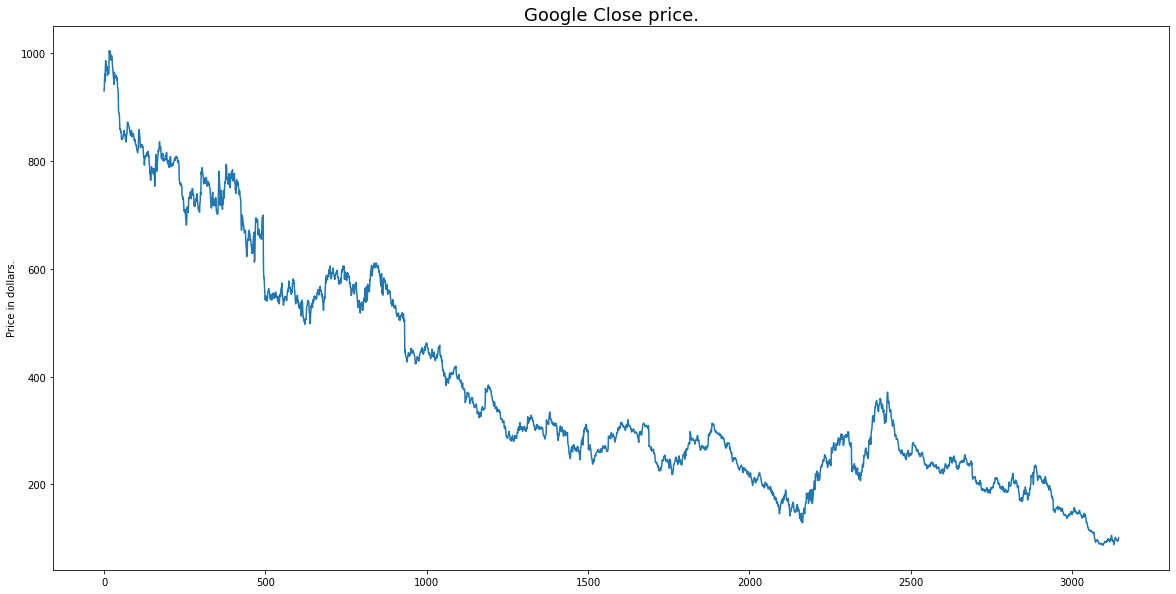

In [6]:
plt.figure(figsize=(20,10))
plt.plot(df['Close'])
plt.title('Google Close price.', fontsize=18)
plt.ylabel('Price in dollars.')
plt.show()

Printing the top 5 values in dataset

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,Year
0,30-Jun-17,943.99,945.00,929.61,929.68,2287662,2017
1,29-Jun-17,951.35,951.66,929.60,937.82,3206674,2017
2,28-Jun-17,950.66,963.24,936.16,961.01,2745568,2017
3,27-Jun-17,961.60,967.22,947.09,948.09,2443602,2017
4,26-Jun-17,990.00,993.99,970.33,972.09,1517912,2017


Calculating the number of zero rows in dataset

In [8]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Year      0
dtype: int64

Plotting the coloumnwise graph for datset

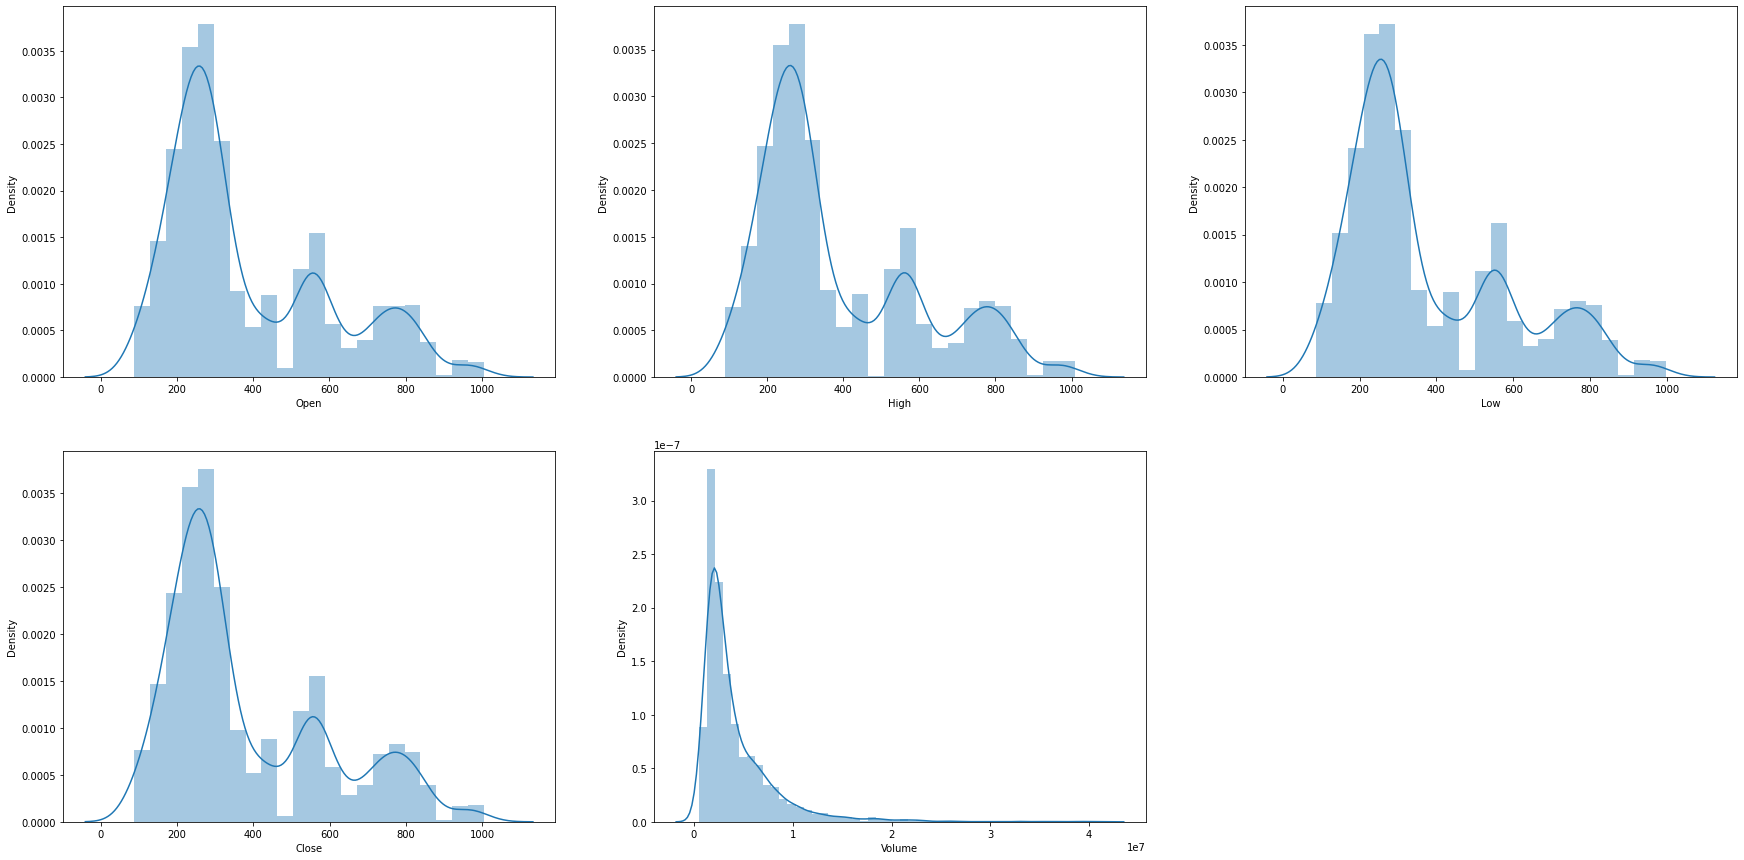

In [9]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(30,15))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

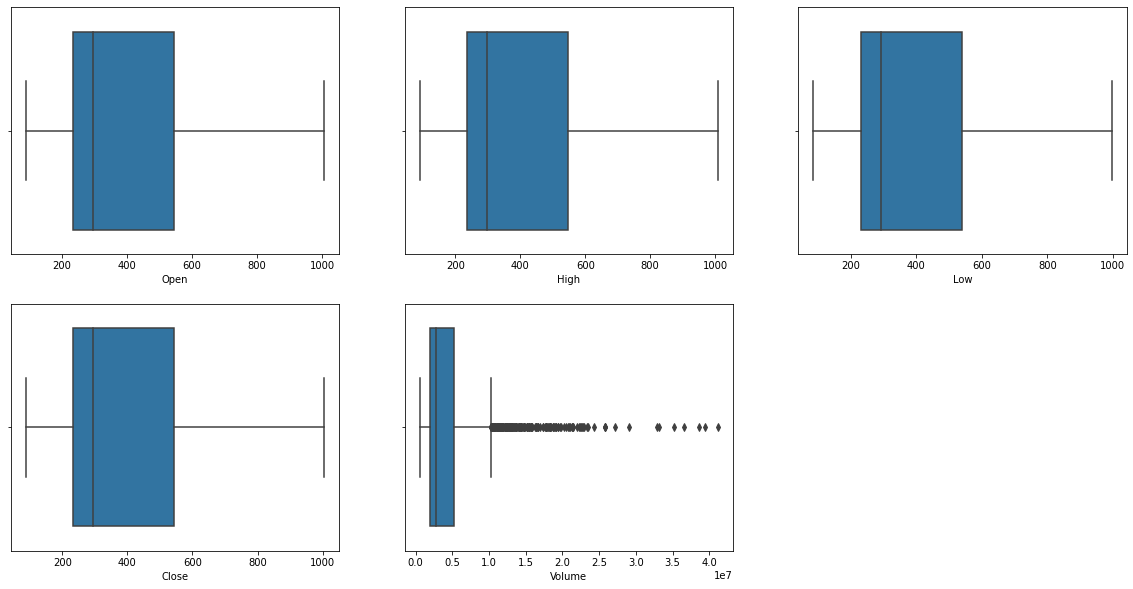

In [10]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

Plotting a pie chart for dataset

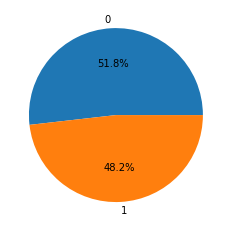

In [11]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

Plotting heatmap for the datset

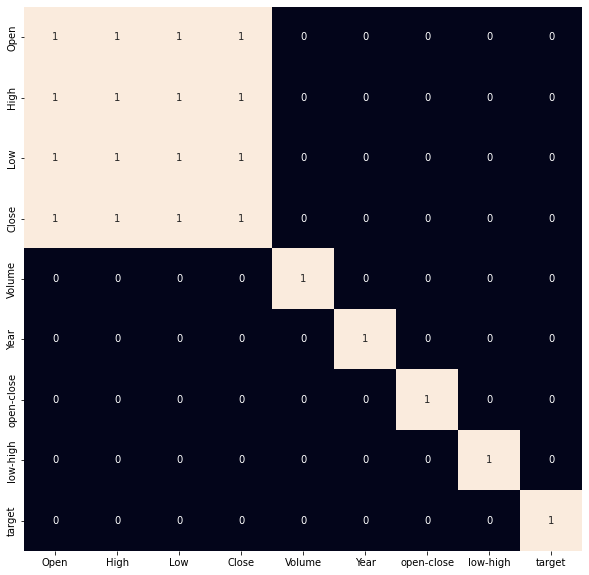

In [12]:
plt.figure(figsize=(10, 10))

sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

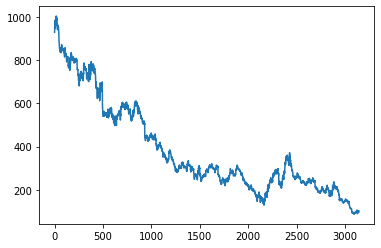

In [13]:
df['Close'].plot()

Scaling the Dataset

In [14]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()



,Open,High,Low,Close,Volume
0,0.932988,0.930808,0.926383,0.918621,0.043444
1,0.941008,0.938052,0.926372,0.927501,0.066046
2,0.940256,0.950648,0.933579,0.952798,0.054706
3,0.952177,0.954978,0.945586,0.938704,0.047279
4,0.983122,0.984097,0.971118,0.964885,0.024514


Setting the target values and defining training and testing data

In [15]:
#Set Target Variable
output_var = pd.DataFrame(df['Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [16]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

Processing the data for applying in LSTM model

In [17]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

Building the LSTM model

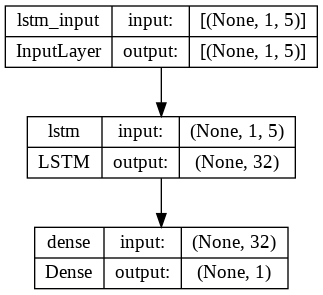

In [18]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

Calculating the epoch value for the Datset 

In [19]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
358/358 [==============================] - 3s 3ms/step - loss: 208129.1875
Epoch 2/100
358/358 [==============================] - 1s 3ms/step - loss: 200551.6094
Epoch 3/100
358/358 [==============================] - 1s 3ms/step - loss: 179758.9531
Epoch 4/100
358/358 [==============================] - 1s 3ms/step - loss: 151458.8594
Epoch 5/100
358/358 [==============================] - 1s 3ms/step - loss: 121093.7266
Epoch 6/100
358/358 [==============================] - 1s 3ms/step - loss: 92000.9531
Epoch 7/100
358/358 [==============================] - 1s 3ms/step - loss: 66423.3438
Epoch 8/100
358/358 [==============================] - 1s 3ms/step - loss: 45667.2422
Epoch 9/100
358/358 [==============================] - 1s 3ms/step - loss: 30148.5352
Epoch 10/100
358/358 [==============================] - 1s 3ms/step - loss: 19500.6504
Epoch 11/100
358/358 [==============================] - 1s 3ms/step - loss: 12791.6543
Epoch 12/100
358/358 [=========================

In [20]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

9/9 [==============================] - 0s 2ms/step


Plotting the graph of predicted stock value and Actual value

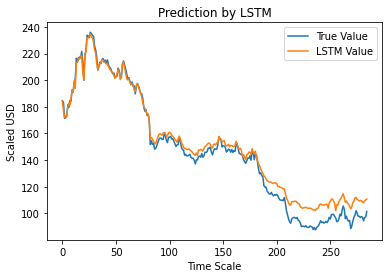

In [21]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

Appling the dataset for other models and calculating the accuracy for those models 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from tensorflow.python.keras.layers.recurrent import LSTM

df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

features = df[['open-close', 'low-high', 'Year']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape,'\n\n')

models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

(2830, 3) (315, 3) 


LogisticRegression() : 
Training Accuracy :  0.9115537167270719
Validation Accuracy :  0.9145858585858586

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.8956188144556722
Validation Accuracy :  0.8861212121212122

XGBClassifier() : 
Training Accuracy :  0.9366449247533783
Validation Accuracy :  0.9161212121212121



Constructing confusin matrix for the LSTM Model

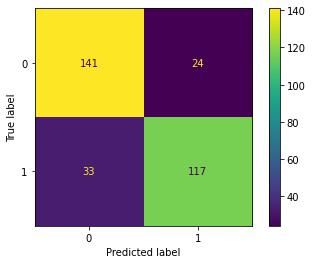

In [39]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()

Predicting the value of stock for nearest future

In [54]:
#importing the packages 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
#dataframe creation
seriesdata = df.sort_index(ascending=True, axis=0)
new_seriesdata = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
length_of_data=len(seriesdata)
for i in range(0,length_of_data):
    new_seriesdata['Date'][i] = seriesdata['Date'][i]
    new_seriesdata['Close'][i] = seriesdata['Close'][i]
#setting the index again
new_seriesdata.index = new_seriesdata.Date
new_seriesdata.drop('Date', axis=1, inplace=True)
#creating train and test sets this comprises the entire data’s present in the dataset
myseriesdataset = new_seriesdata.values
totrain = myseriesdataset[0:255,:]
tovalid = myseriesdataset[255:,:]
#converting dataset into x_train and y_train
scalerdata = MinMaxScaler(feature_range=(0, 1))
scale_data = scalerdata.fit_transform(myseriesdataset)
x_totrain, y_totrain = [], []
length_of_totrain=len(totrain)
for i in range(60,length_of_totrain):
    x_totrain.append(scale_data[i-60:i,0])
    y_totrain.append(scale_data[i,0])
x_totrain, y_totrain = np.array(x_totrain), np.array(y_totrain)
x_totrain = np.reshape(x_totrain, (x_totrain.shape[0],x_totrain.shape[1],1))
#LSTM neural network
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_totrain.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adadelta')
# lstm_model.fit(x_totrain, y_totrain, epochs=3, batch_size=1, verbose=2)
#predicting next data stock price
myinputs = new_seriesdata[len(new_seriesdata) - (len(tovalid)+1) - 60:].values
myinputs = myinputs.reshape(-1,1)
myinputs  = scalerdata.transform(myinputs)
tostore_test_result = []
for i in range(60,myinputs.shape[0]):
    tostore_test_result.append(myinputs[i-60:i,0])
tostore_test_result = np.array(tostore_test_result)
tostore_test_result = np.reshape(tostore_test_result,(tostore_test_result.shape[0],tostore_test_result.shape[1],1))
myclosing_priceresult = lstm_model.predict(tostore_test_result)
myclosing_priceresult = scalerdata.inverse_transform(myclosing_priceresult)

totrain = myseriesdataset[0:255,:]
tovalid = myseriesdataset[255:,:]

#predicting next data stock price
myinputs = new_seriesdata[len(new_seriesdata) - (len(tovalid)+1) - 60:].values

print(len(tostore_test_result));
print(myclosing_priceresult);



91/91 [==============================] - 3s 19ms/step
2891
[[220.51897 ]
 [219.74033 ]
 [218.89668 ]
 ...
 [ 89.4694  ]
 [ 89.45935 ]
 [ 89.456635]]
